# Project: Marketing Campaign Performance Analysis

## Introduction

In this project, I will analyze the **"Marketing Campaign Performance"** dataset, which contains detailed information on the performance of various marketing campaigns conducted by a company in Malaysia. The goal of this project is to apply data processing and cleaning techniques, exploratory analysis, and visualization to extract valuable insights that could enhance the company's marketing strategies.

## Project Objectives

- **Understand and preprocess the dataset**: Identify and manage missing values, inconsistencies, and outliers.
- **Perform Exploratory Data Analysis (EDA)**: Discover patterns and meaningful relationships among variables.
- **Visualize data**: Create informative visualizations using Matplotlib, Seaborn, and Plotly.
- **Draw conclusions**: Interpret results and provide recommendations based on the analysis.

## Dataset Description

The dataset includes the following features:

- **Campaign_ID**: Unique identifier for each campaign.
- **Channel**: Marketing channel used (e.g., Social Media, Email, TV, News, Radio, Billboard).
- **Product_Category**: Product category (e.g., Electronics, Fashion, Groceries, Automotive, Health).
- **Region**: Geographic region in Malaysia targeted by the campaign (e.g., Kuala Lumpur, Penang, Malacca, Johor, Sabah, Sarawak).
- **Budget**: Assigned budget in Malaysian Ringgit.
- **Spend**: Actual campaign expenditure in Malaysian Ringgit.
- **Impressions**: Number of times the ad was viewed.
- **Clicks**: Number of clicks the ad received.
- **CTR**: Click-through rate.
- **Conversions**: Number of successful actions (e.g., purchases, registrations).
- **CR**: Conversion rate.
- **Revenue**: Revenue generated by the campaign in Malaysian Ringgit.
- **ROI**: Return on investment (Revenue divided by Spend).
- **Duration**: Duration of the campaign in days.
- **Start_Date**: Campaign start date.
- **End_Date**: Campaign end date.
- **Customer_Satisfaction**: Customer satisfaction rating (1 to 5).
- **Campaign_Effectiveness**: Campaign effectiveness according to the marketing team (1 to 10).
- **Market_Segment**: Target market segment (Low, Medium, High).

**Note**: The dataset includes missing values to simulate real-world scenarios.

## Project Steps


### 1. Setting Up the Working Environment

- Install the following libraries: **Python**, **Pandas**, **NumPy**, **Matplotlib**, **Seaborn**, **Plotly**.

### 2. Data Loading

- Import the necessary libraries.
- Load the dataset into a Pandas DataFrame.

### 3. Initial Data Inspection

- View the first and last rows of the DataFrame.
- Get general information on the dataset.
- Identify columns and their data types.

### 4. Data Cleaning

#### 4.1 Handling Missing Values

- Identify columns with missing values.
- Decide on how to handle missing values:
  - **Remove rows or columns** with many missing values.
  - **Impute values** using methods like mean, median, or mode.

#### 4.2 Handling Outliers

- Use box plots to identify outliers in numerical variables.
- Decide how to handle outliers:
  - **Retain them** if relevant.
  - **Remove them** if erroneous.
  - **Transform them** using methods such as logarithmic transformation.

#### 4.3 Correcting Inconsistencies

- Check and correct inconsistencies in categorical data (e.g., uppercase/lowercase, white spaces).

### 5. Exploratory Data Analysis (EDA)

#### 5.1 Univariate Analysis

- Analyze the distribution of numerical variables.
  - Create histograms and KDE plots.
- Analyze the frequency of categorical variables.
  - Create bar charts.

#### 5.2 Bivariate Analysis

- Explore relationships between two variables:
  - **Numerical vs Numerical**: Scatter plots, calculate correlations.
  - **Categorical vs Numerical**: Box plots, violin plots.
  - **Categorical vs Categorical**: Contingency tables, heatmaps.

#### 5.3 Multivariate Analysis

- Create correlation matrices for numerical variables.
- Perform cluster analysis or segmentation if relevant.

### 6. Data Visualization

- Use **Matplotlib** and **Seaborn** for static visualizations.
- Use **Plotly** for interactive visualizations.
- Suggested visualizations:
  - **Bar charts**: Revenue by channel, ROI by product category.
  - **Geographic maps**: Performance by region.
  - **Time series**: Trends in impressions and clicks over time.

### 7. Interpretation and Conclusions

- Summarize key findings from your analysis.
- Answer questions like:
  - Which marketing channels are most effective?
  - Which regions generate the most revenue?
  - Is there a correlation between budget and ROI?
- Provide recommendations for future campaigns.

### 8. Documentation and Presentation

- Document the entire process, including code and visualizations.
- Prepare a presentation or report summarizing the findings.
- Ensure the conclusions are supported by data.

### **1. Environment Setup**

In [1]:
# Import necessary libraries

import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns  
import plotly.express as px  
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### **2. Data Loading**

In [2]:
# Load the dataset into a Pandas DataFrame

file_path ='C:\\Users\\inesc\\OneDrive\\Documentos\\GitHub\\Marketing_Campaign_Performance_Analysis\\mcp_1.csv'
data = pd.read_csv(file_path)

### **3. Initial Data Inspection**

In [3]:
# Concatenate the first 5 and last 5 rows
data_top_bottom = pd.concat([data.head(), data.tail()])

# Apply styling with highlighted missing values and formatted columns
styled_data = data_top_bottom.style \
    .highlight_null() \
    .format({'Budget': "{:,.2f}", 'Spend': "{:,.2f}", 'Revenue': "{:,.2f}", 'ROI': "{:.2f}"}) \
    .set_properties(**{'border': '1px solid black', 'color': 'black'}) \
    .set_caption("First and Last 5 Rows of the Marketing Campaign Dataset")

display(styled_data)

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
0,CAM0001,Billboard,Fashion,Kuala Lumpur,"484,341.00","197,038.00",545901.000000,nan,0.078500,7993.000000,0.341400,"849,005.00",0.64,212.000000,2/3/2023,23/12/2023,3.000000,3.000000,Medium
1,CAM0002,nan,Health,Sarawak,"468,792.00","33,743.00",527513.000000,4130.000000,0.947900,9459.000000,nan,"921,078.00",3.78,29.000000,nan,nan,3.000000,7.000000,Medium
2,CAM0003,Radio,Electronics,Penang,"10,487.00","6,745.00",806911.000000,12209.000000,nan,7168.000000,0.051700,"51,142.00",3.64,74.000000,12/4/2023,20/10/2023,1.000000,2.000000,Medium
3,CAM0004,Email,Electronics,Penang,"345,431.00","329,112.00",108570.000000,34391.000000,0.615700,7190.000000,0.357900,"191,887.00",2.64,67.000000,24/4/2023,26/1/2023,5.000000,6.000000,High
4,CAM0005,Radio,Fashion,Kuala Lumpur,"322,345.00","34,365.00",799855.000000,13056.000000,nan,1794.000000,0.054400,"167,241.00",1.02,40.000000,10/1/2023,1/1/2023,5.000000,6.000000,Low
4995,CAM4996,Email,Automotive,Kuala Lumpur,"373,204.00","239,182.00",947505.000000,27359.000000,0.444600,2725.000000,0.164300,"739,721.00",17.29,170.000000,4/4/2023,15/12/2023,4.000000,5.000000,Low
4996,CAM4997,Radio,Electronics,Kuala Lumpur,"81,357.00","381,641.00",270685.000000,2575.000000,0.822400,1555.000000,0.242500,"324,435.00",1.50,148.000000,28/1/2023,26/12/2023,2.000000,7.000000,Low
4997,CAM4998,Radio,nan,Kuala Lumpur,"216,060.00","122,475.00",6042568.044000,42563.000000,0.589400,nan,nan,"647,246.00",nan,340.000000,7/6/2023,6/12/2023,3.000000,5.000000,nan
4998,CAM4999,Social Media,Electronics,Kuala Lumpur,"120,531.00","433,558.00",857140.000000,7037.000000,0.286300,3374.000000,0.903900,"373,110.00",0.39,76.000000,2/11/2023,23/8/2023,2.000000,1.000000,Medium
4999,CAM5000,TV,Automotive,Sabah,"476,378.00","261,529.00",308009.000000,45922.000000,0.518700,3047.000000,0.043800,"146,303.00",0.77,330.000000,1/1/2023,6/11/2023,1.000000,1.000000,High


In [4]:
# Get general information about the dataset

print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Campaign_ID             4741 non-null   object 
 1   Channel                 4746 non-null   object 
 2   Product_Category        4733 non-null   object 
 3   Region                  4739 non-null   object 
 4   Budget                  4500 non-null   float64
 5   Spend                   4501 non-null   float64
 6   Impressions             4496 non-null   float64
 7   Clicks                  4514 non-null   float64
 8   CTR                     4502 non-null   float64
 9   Conversions             4506 non-null   float64
 10  CR                      4504 non-null   float64
 11  Revenue                 4491 non-null   float64
 12  ROI                     4505 non-null   float64
 13  Duration                4521 non-null   float64
 14  Start_Date        

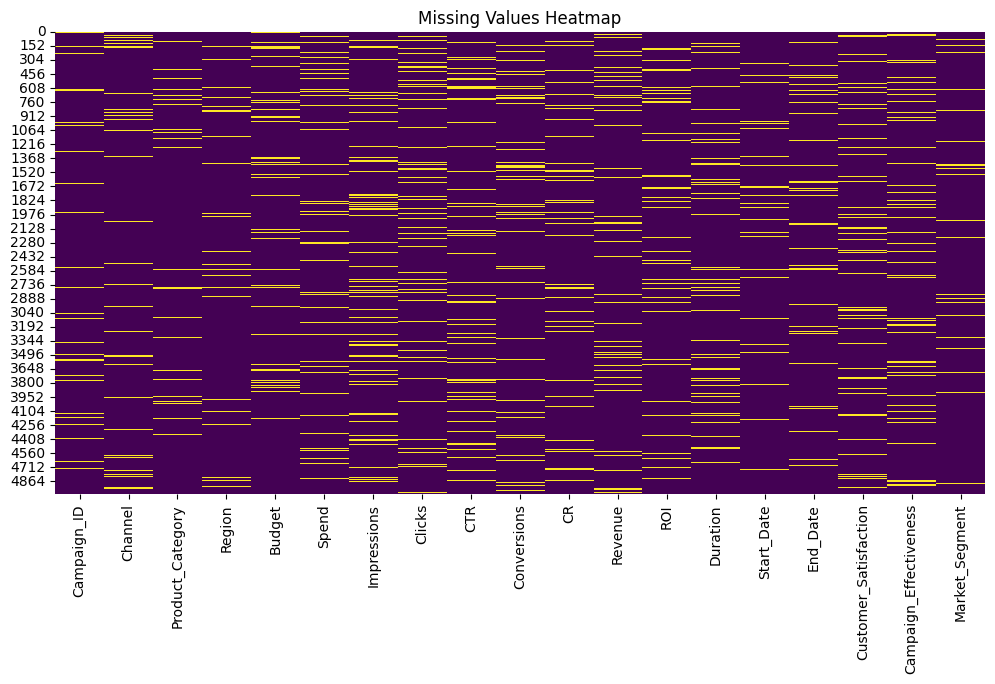

In [5]:
# Heatmap to visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [6]:
# Display column names and their data types
print("\nColumns and their data types:")
print(data.dtypes)


Columns and their data types:
Campaign_ID                object
Channel                    object
Product_Category           object
Region                     object
Budget                    float64
Spend                     float64
Impressions               float64
Clicks                    float64
CTR                       float64
Conversions               float64
CR                        float64
Revenue                   float64
ROI                       float64
Duration                  float64
Start_Date                 object
End_Date                   object
Customer_Satisfaction     float64
Campaign_Effectiveness    float64
Market_Segment             object
dtype: object


### **4. Data Cleaning**

#### **4.1 Handling Missing Values**

In [7]:
# Identify columns with missing values

missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0]
print("\nColumns with missing values and their count:")
print(missing_data)


Columns with missing values and their count:
Campaign_ID               259
Channel                   254
Product_Category          267
Region                    261
Budget                    500
Spend                     499
Impressions               504
Clicks                    486
CTR                       498
Conversions               494
CR                        496
Revenue                   509
ROI                       495
Duration                  479
Start_Date                259
End_Date                  257
Customer_Satisfaction     492
Campaign_Effectiveness    490
Market_Segment            262
dtype: int64


In [8]:
# Define a strategy for handling missing values:

# Drop columns with more than 50% missing values (if any)
threshold = 0.5 * len(data)
data = data.dropna(thresh=threshold, axis=1)

# Impute missing values for numeric columns with mean or median, categorical with mode

for column in data.columns:
    if data[column].isnull().sum() > 0:
        if data[column].dtype == 'object':
            # Fill categorical columns with mode without inplace
            data[column] = data[column].fillna(data[column].mode()[0])
        else:
            # Fill numerical columns with median without inplace
            data[column] = data[column].fillna(data[column].median())

In [9]:
# Verify missing values have been handled
print("\nMissing values after imputation:")
print(data.isnull().sum())


Missing values after imputation:
Campaign_ID               0
Channel                   0
Product_Category          0
Region                    0
Budget                    0
Spend                     0
Impressions               0
Clicks                    0
CTR                       0
Conversions               0
CR                        0
Revenue                   0
ROI                       0
Duration                  0
Start_Date                0
End_Date                  0
Customer_Satisfaction     0
Campaign_Effectiveness    0
Market_Segment            0
dtype: int64


#### **4.2 Handling Outliers**

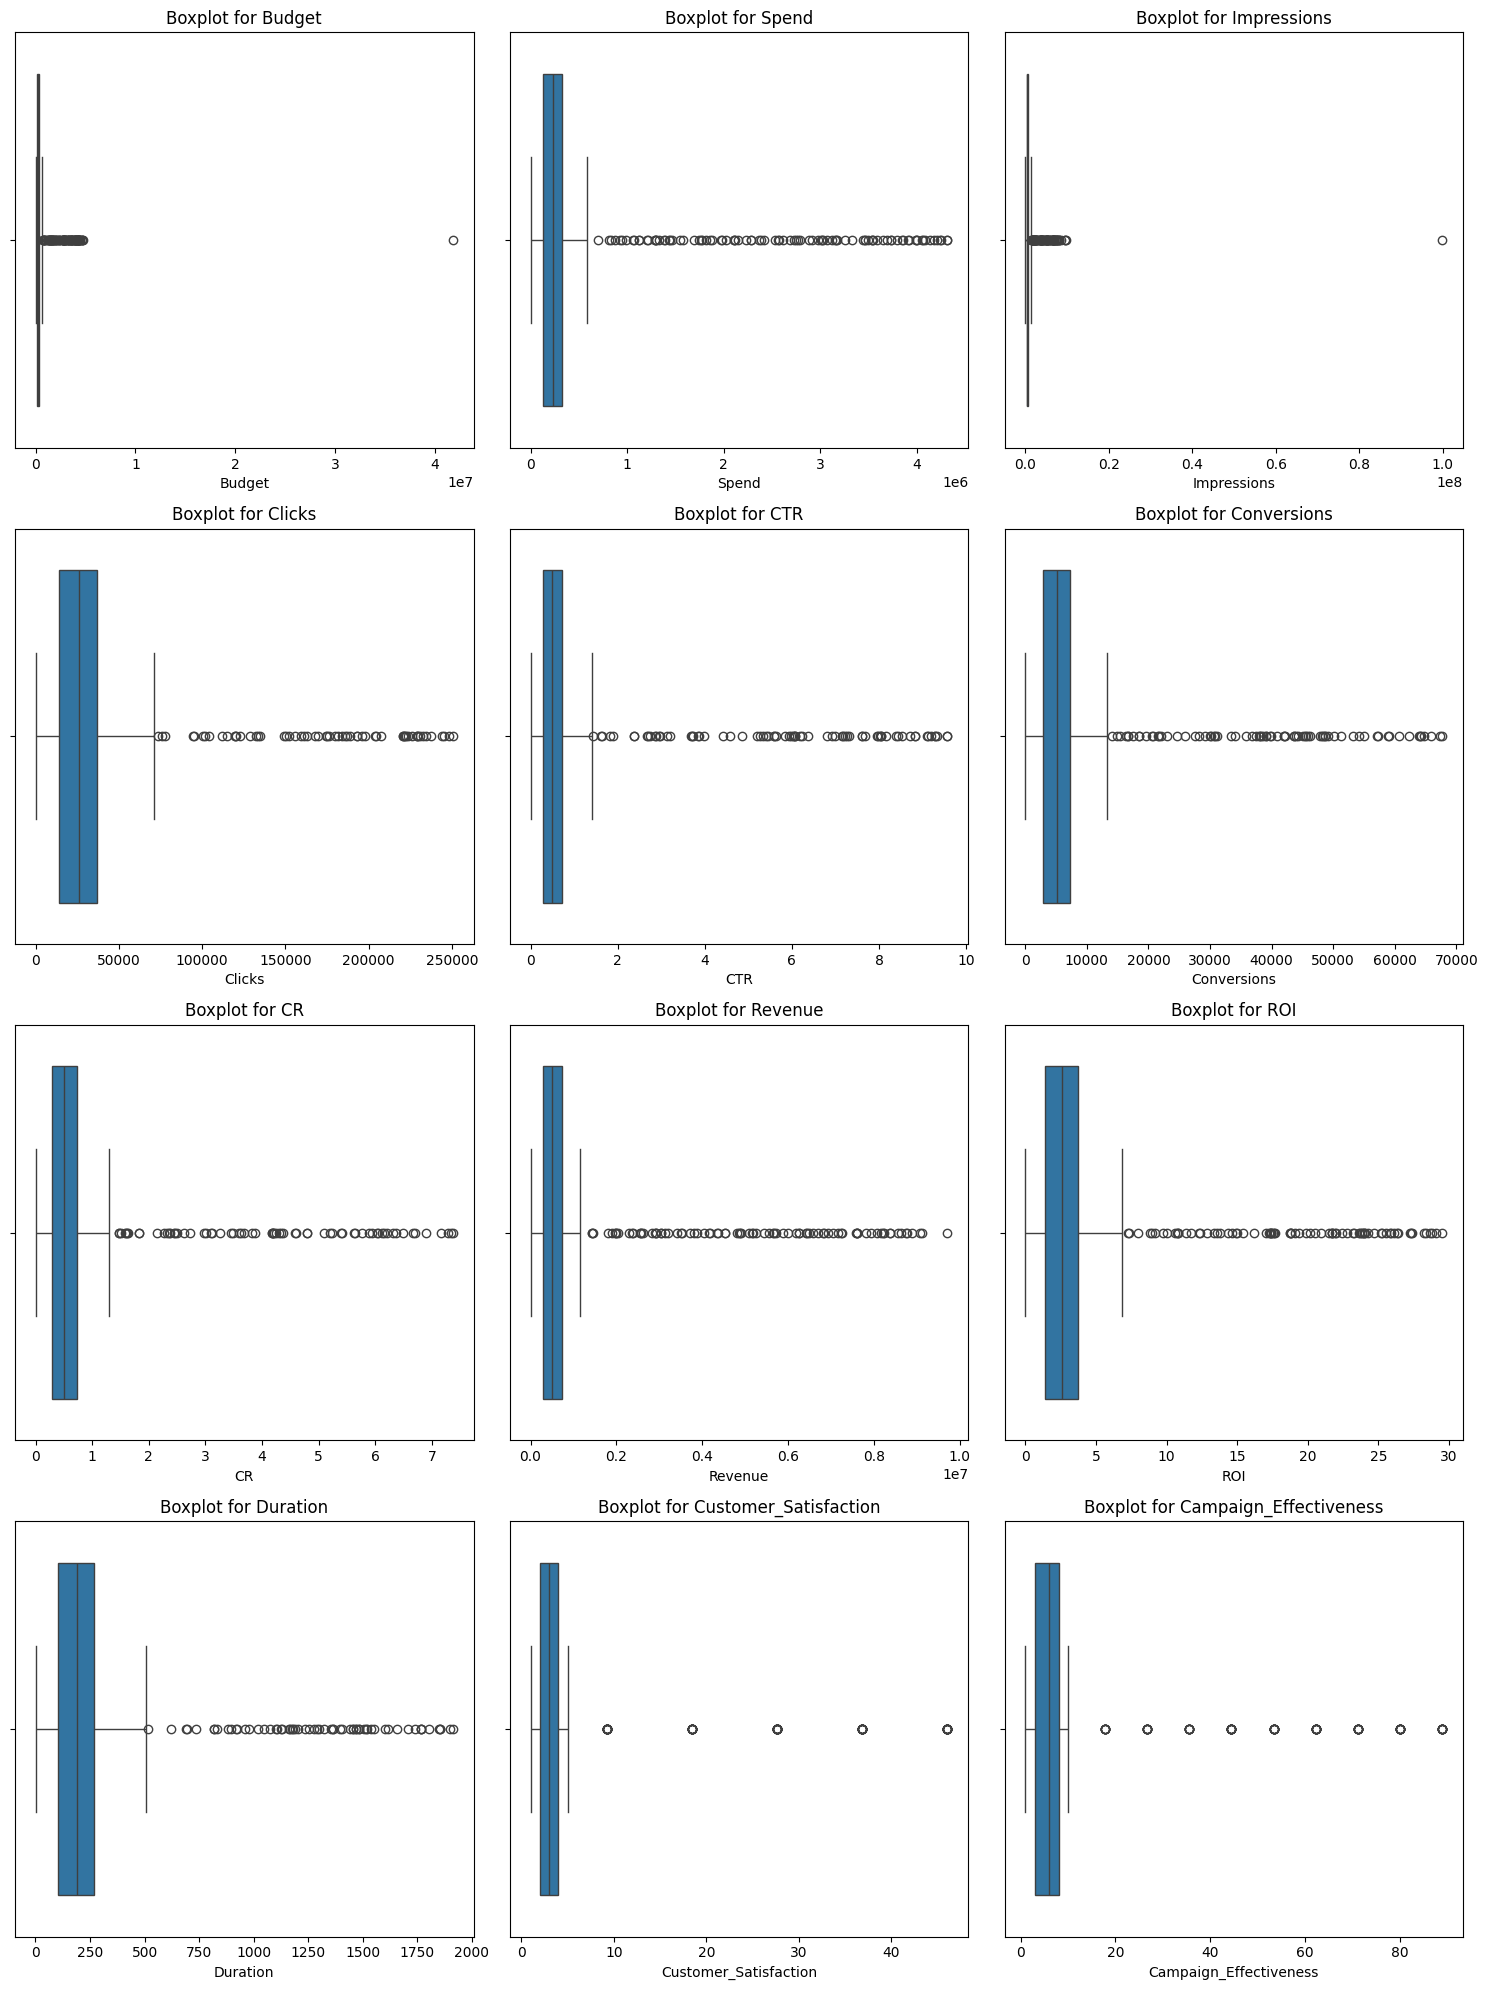

In [10]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate number of rows and columns for subplots grid
num_cols = 3  # Number of columns
num_rows = math.ceil(len(numerical_columns) / num_cols)  # Number of rows

# Create subplots for each numerical column
plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size for more rows if needed
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()

##### **Interpreting the plot:**

These boxplots reveal variability and outliers across different campaign metrics. Outliers and skewed distributions indicate that some campaigns perform much better (or worse) than others, which is important for:

- **Benchmarking Success:** Use the median and IQR to establish typical performance levels and identify exceptional campaigns.

- **Further Analysis of Outliers:** Focus on the campaigns that are outliers in terms of ROI, Revenue, CTR, and CR, as they may contain valuable insights about what works well or what needs improvement.

- **Guiding Resource Allocation:** Insights into Budget, Spend, and Duration outliers could guide strategic allocation of resources and optimization of campaign lengths for future campaigns.

In [11]:
# Decide handling strategy:
# - Keep, transform, or remove extreme outliers based on domain knowledge

# Example: Removing outliers beyond 1.5 * IQR (common practice, customize if necessary)
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

#### **4.3 Fixing Inconsistencies in Categorical Data**

In [12]:
# Standardize formatting for categorical columns (e.g., case and whitespace)

categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = data[col].str.strip().str.lower()

# Confirm no inconsistencies in categorical columns
for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(data[col].unique())
    print()

Unique values in Campaign_ID:
['cam0001' 'cam0002' 'cam0003' ... 'cam4997' 'cam4999' 'cam5000']

Unique values in Channel:
['billboard' 'radio' 'email' 'tv' 'social media']

Unique values in Product_Category:
['fashion' 'health' 'electronics' 'automotive' 'groceries']

Unique values in Region:
['kuala lumpur' 'sarawak' 'penang' 'johor' 'sabah']

Unique values in Start_Date:
['2/3/2023' '11/9/2023' '12/4/2023' '24/4/2023' '10/1/2023' '16/8/2023'
 '21/6/2023' '22/5/2023' '20/6/2023' '18/2/2023' '7/1/2023' '1/12/2023'
 '5/5/2023' '18/12/2023' '28/11/2023' '3/3/2023' '4/8/2023' '25/7/2023'
 '6/10/2023' '2/4/2023' '16/3/2023' '7/9/2023' '28/6/2023' '22/3/2023'
 '18/1/2023' '16/9/2023' '28/1/2023' '26/8/2023' '13/4/2023' '13/8/2023'
 '2/2/2023' '24/2/2023' '19/1/2023' '23/6/2023' '29/1/2023' '12/3/2023'
 '28/2/2023' '28/8/2023' '9/12/2023' '1/5/2023' '25/9/2023' '13/1/2023'
 '1/7/2023' '10/8/2023' '23/4/2023' '14/9/2023' '7/6/2023' '11/10/2023'
 '30/12/2023' '31/8/2023' '22/12/2023' '23/5/20

### **5: Exploratory Data Analysis (EDA)**

#### **5.1 Univariate Analysis**

- Distribution of Numerical Variables: Use histograms and KDE plots.
- Frequency of Categorical Variables: Use bar plots to examine the distribution of values.


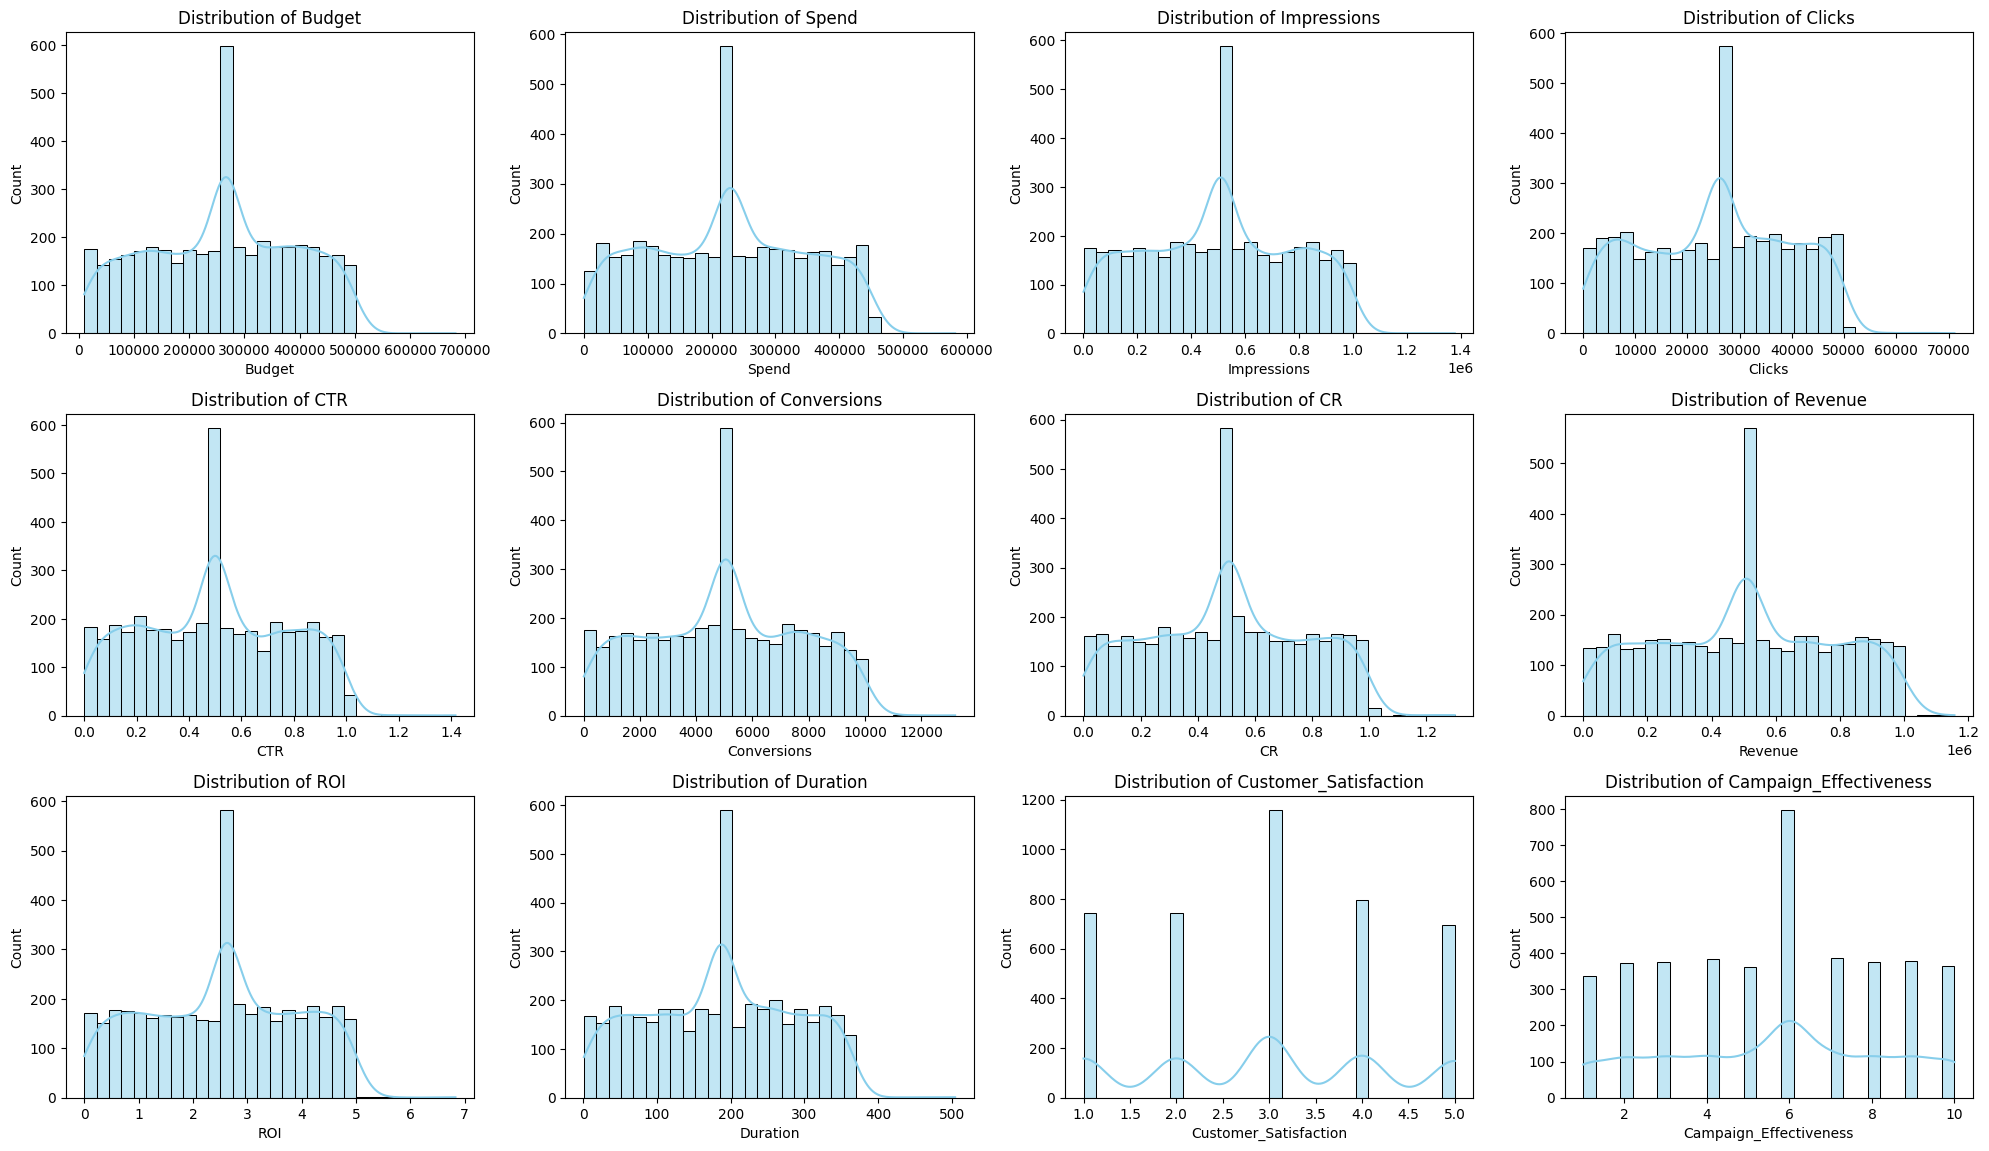

In [13]:
# Set up the plot grid for numerical distributions
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)  # Adjust grid size based on the number of numerical columns
    sns.histplot(data[col], kde=True, color="skyblue", bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

#### **Initial Exploration:**

- Most campaigns are allocated a mid-range budget, so it could be worth testing high-budget campaigns on specific high-performing channels or customer segments.

- Campaigns generally have moderate reach and engagement, so it could be worth optimizing these campaigns to increase click-through rate (CTR) by refining the messaging or adjusting audience targeting.

- Most campaigns are not exceptional in terms of CTR with a peak of 0.6. If certain messaging or visual styles correlate with high CTR, replicate these in future campaigns to boost engagement.

- While many campaigns are capable of driving engagement, fewer are converting at an optimal rate.Focusing on understanding the factors driving high CR in certain campaigns could improve conversions.

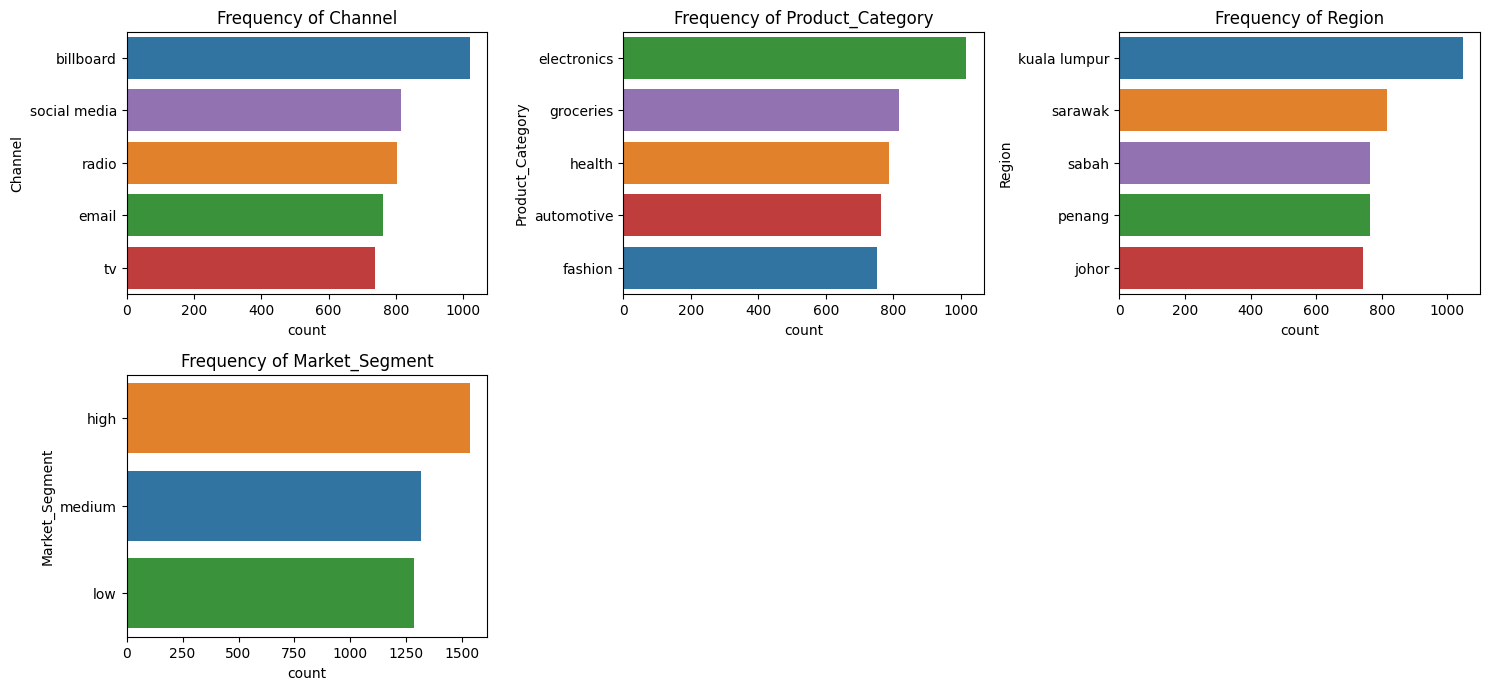

In [14]:
# Set up the plot grid for categorical frequencies, excluding high-cardinality columns
categorical_columns = data.select_dtypes(include=['object']).columns
high_cardinality_cols = ['Campaign_ID', 'Start_Date', 'End_Date']  # Adjust based on your dataset
filtered_columns = [col for col in categorical_columns if col not in high_cardinality_cols]

plt.figure(figsize=(15, 10))
for i, col in enumerate(filtered_columns, 1):
    plt.subplot(3, 3, i)  # Adjust grid size based on the number of categorical columns
    sns.countplot(y=data[col], order=data[col].value_counts().index[:10], hue=data[col], legend=False)  # Display top 10 categories
    plt.title(f'Frequency of {col}')
plt.tight_layout()
plt.show()

#### **Initial Exploration:**

- Billboard is the most frequently used marketing channel, which suggests a focus on broad, high-reach marketing. Consider shifting more resources toward channels like social media and email for a more targeted approach, to enable better personalization and engagement tracking.

- The prominence of electronics campaigns suggests this category may have higher demand or a higher budget allocation. Consider assessing the performance of lower-frequency categories like fashion and automotive. If they are performing well in terms of ROI, it might be worthwhile to increase their campaign frequency or explore different channels.

- Kuala Lumpur’s high frequency might reflect its status as a major metropolitan and economic hub, so consider tailoring campaigns to urban, tech-savvy audiences, possibly with a focus on digital and social media channels. If ROI is comparable across regions, evaluate opportunities to increase presence in other regions, which may present less saturated markets.

- The focus on high-value segments suggests that campaigns are skewed toward potentially more profitable customer groups. Within the high-value segment, consider more granular targeting based on specific interests or behaviors. For high-value customers, consider premium or exclusive offers, while for low- and medium-value customers, focus on discounts or value-based messaging.

#### **5.2 Bivariate Analysis**

- Numerical vs Numerical: Scatter plots and correlation heatmap.
- Categorical vs Numerical: Box plots to see distributions across categories.
- Categorical vs Categorical: Heatmap based on cross-tabulations.

In [15]:
# Calculate the correlation matrix and filter based on threshold
correlation_matrix = data[numerical_columns].corr().abs()
threshold = 0.3  # Lower threshold if needed
high_corr_pairs = correlation_matrix[correlation_matrix > threshold]

# Remove self-correlations by setting diagonal to NaN
for i in range(len(high_corr_pairs)):
    high_corr_pairs.iloc[i, i] = None

# Drop rows and columns with no high correlations
high_corr_pairs = high_corr_pairs.dropna(how='all').dropna(how='all', axis=1)

# Get the list of significant variables if any are found
if not high_corr_pairs.empty:
    significant_vars = list(high_corr_pairs.columns)
    # Create pair plot for these variables
    sns.pairplot(data[significant_vars])
    plt.suptitle('Pair Plot for Highly Correlated Numerical Variables', y=1.02)
    plt.show()
else:
    print("No pairs with correlation above the threshold.")

No pairs with correlation above the threshold.


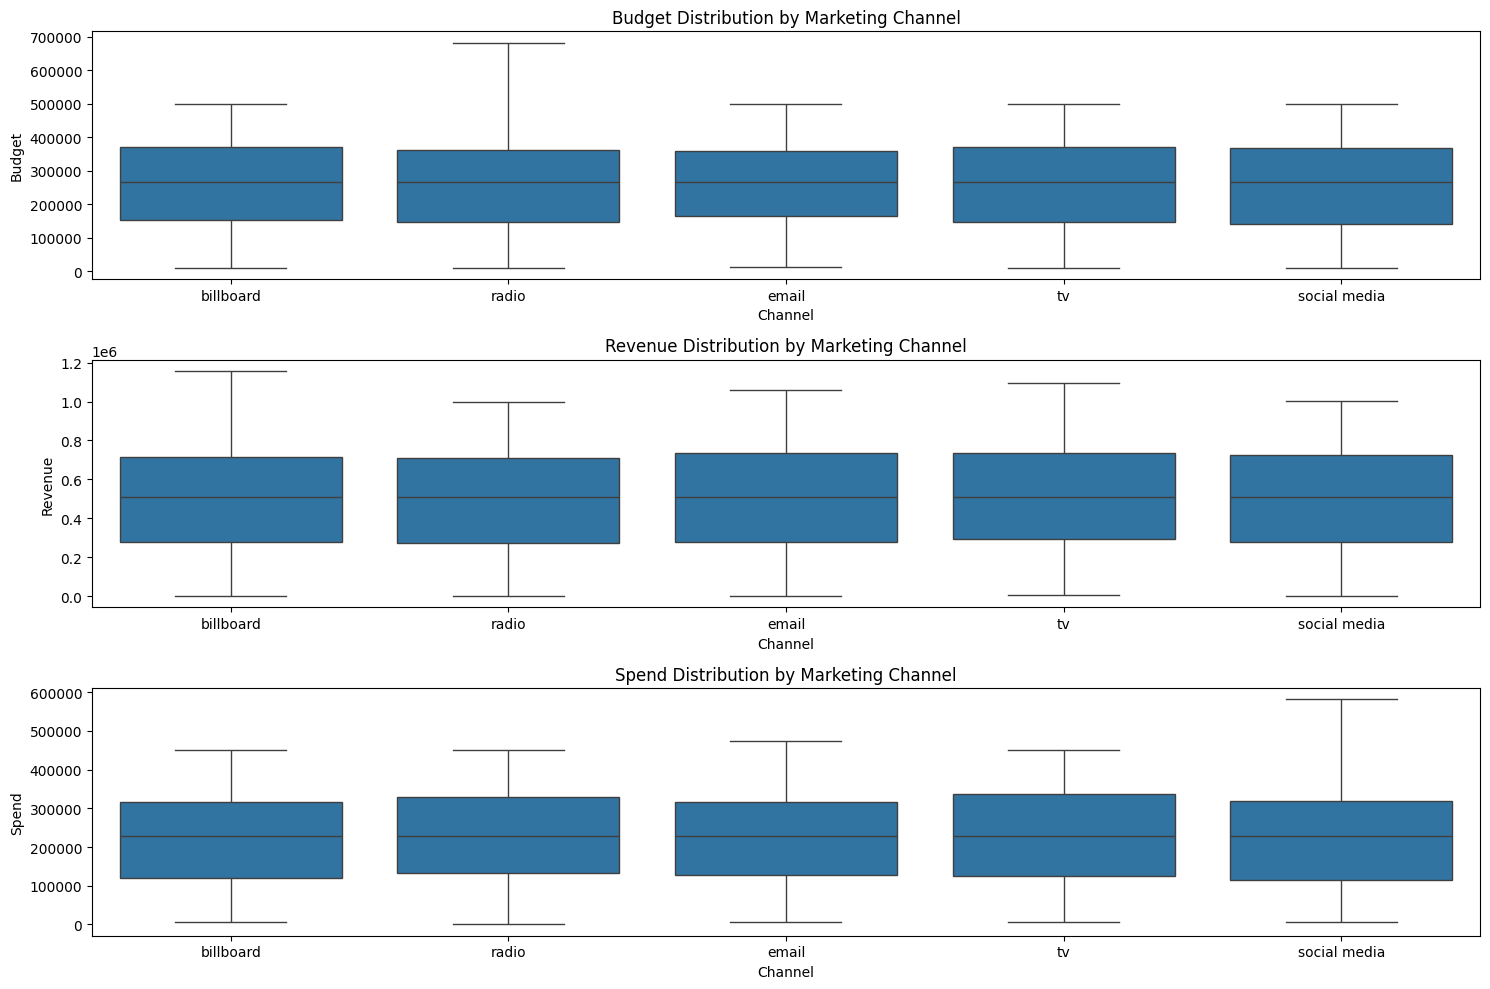

In [16]:
# 5.2.2 Categorical vs Numerical
# Example of boxplots for categorical vs numerical
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Budget', 'Revenue', 'Spend'], 1):  # Adjust columns based on interest
    plt.subplot(3, 1, i)
    sns.boxplot(x=data['Channel'], y=data[col])
    plt.title(f'{col} Distribution by Marketing Channel')
plt.tight_layout()
plt.show()

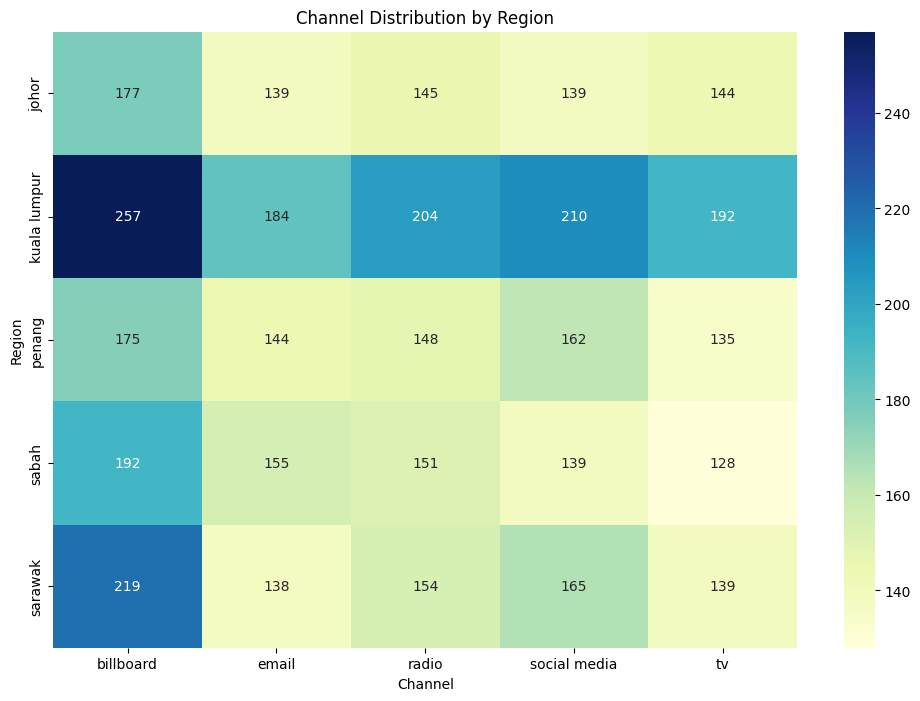

In [17]:
# 5.2.3 Categorical vs Categorical
# Heatmap of counts using cross-tabulation
cross_tab = pd.crosstab(data['Region'], data['Channel'])
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Channel Distribution by Region')
plt.show()

#### **5.3 Multivariate Analysis**

In this section, I’ll perform multivariate analysis by examining correlations among numerical variables and conducting a preliminary analysis of clusters if any patterns arise.

These steps cover the basics of univariate, bivariate, and multivariate analyses. The EDA will help in identifying key trends, patterns, and relationships among different features of the marketing dataset, providing insight into factors such as:

- Channel effectiveness and regional performance (via categorical variable distributions).
- Budget and spend efficiencies (via correlations and scatter plots).
- Potential clusters in market segments, customer satisfaction, and campaign effectiveness.

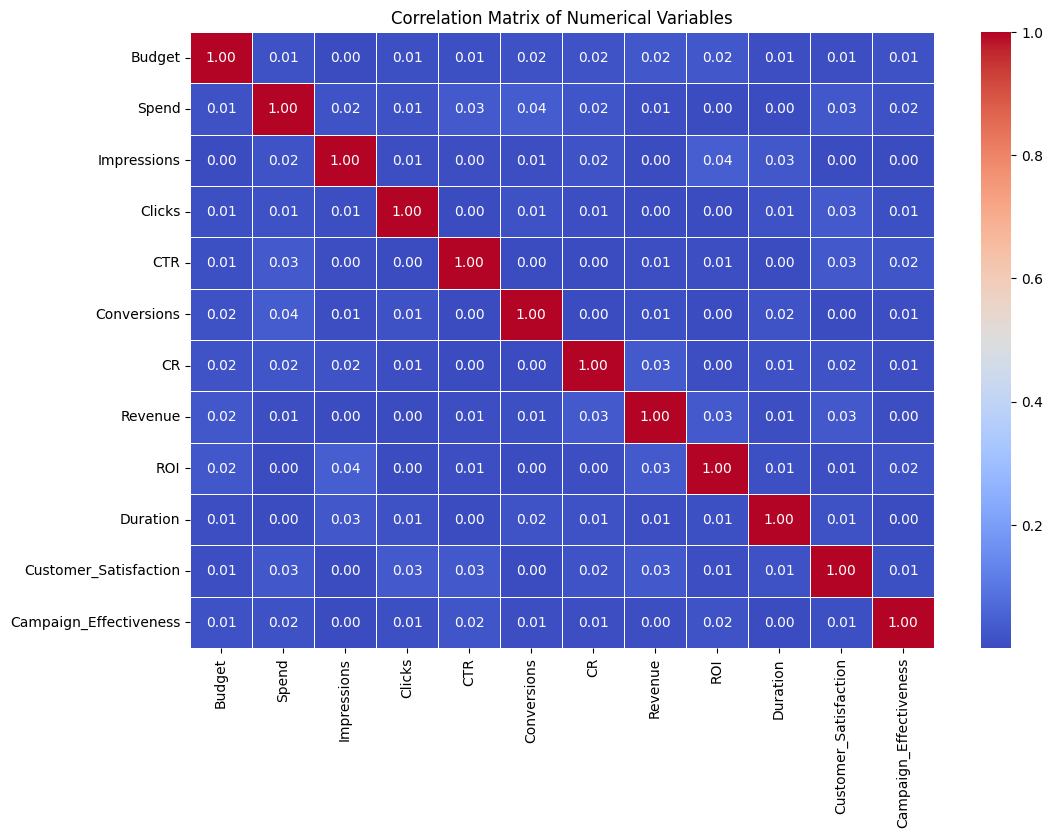

In [18]:
# 5.3.1 Correlation Matrix for Numerical Variables
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

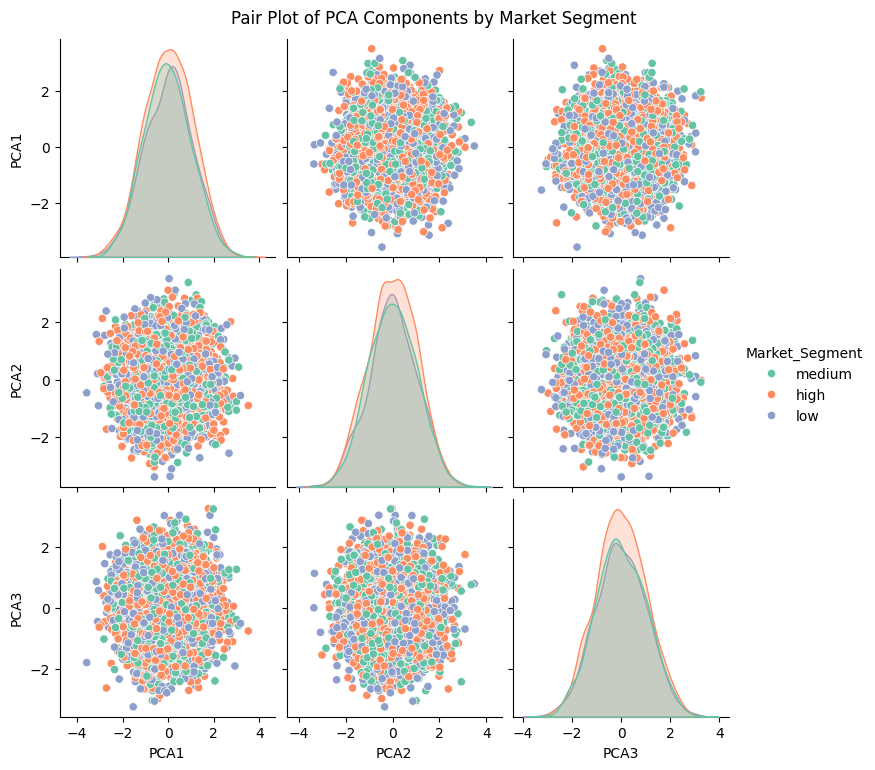

In [19]:
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(data[numerical_columns])

# Apply PCA
pca = PCA(n_components=3)  # Use 2 or 3 components based on preference
pca_components = pca.fit_transform(numerical_data_scaled)

# Create a DataFrame with PCA results and the 'Market_Segment' column
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['Market_Segment'] = data['Market_Segment'].values

# Plot a pair plot of the principal components
sns.pairplot(pca_df, hue='Market_Segment', palette='Set2', diag_kind='kde')
plt.suptitle('Pair Plot of PCA Components by Market Segment', y=1.02)
plt.show()

##### **Interpreting the Plot:**

- **Cluster Analysis:** PCA is often used to see if data naturally forms clusters. In this plot, the colors represent different Market_Segment groups. If these groups formed separate, distinct clusters, it would suggest that these market segments differ significantly in the PCA-transformed space.

- **Current Observation:** From this plot, it seems that all three Market_Segment groups are spread out and overlapping across all components (PCA1, PCA2, and PCA3). This indicates that the PCA-transformed data does not show clear separations between the market segments, suggesting that these groups may not differ strongly in terms of the original features.

- **Variance Explanation:** Each principal component explains part of the variance in the data. Since the points are spread out without distinct clusters, it might suggest that Market_Segment doesn’t influence the variables in a way that creates clear, separate clusters in PCA space.

#### **Analyzing subsets of the data:**
This can often reveal patterns that aren’t apparent when looking at the entire dataset. Here I will focus on high-budget campaigns and explore clustering within this subset.

In [20]:
# Define high-budget threshold (e.g., top 25% of budget values)
budget_threshold = data['Budget'].quantile(0.75)

# Filter the data to only include high-budget campaigns and explicitly create a copy
high_budget_data = data[data['Budget'] >= budget_threshold].copy()

# Select relevant features for clustering
features = ['Spend', 'Impressions', 'Clicks', 'Conversions', 'ROI']
clustering_data = high_budget_data[features].dropna()  # Drop any rows with missing values

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Apply K-Means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
high_budget_data['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

In [21]:
# Interactive scatter plot for Spend vs. ROI with clusters
fig = px.scatter(
    high_budget_data,
    x='Spend',
    y='ROI',
    color='Cluster',
    title="Interactive Clusters of High-Budget Campaigns (Spend vs. ROI)",
    labels={'Spend': 'Spend (RM)', 'ROI': 'ROI'},
    color_discrete_sequence=px.colors.qualitative.Set2,
    hover_data={'Channel': True, 'Region': True}  # Include additional info in hover tooltip
)

# Customize marker size and layout
fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.update_layout(
    xaxis_title="Spend (RM)",
    yaxis_title="ROI",
    legend_title="Cluster",
    template="plotly_dark"
)

# Display the interactive plot
fig.show()

##### **Interpreting the Plot:**

This scatter plot represents the clusters found within high-budget campaigns, using Spend on the x-axis and ROI on the y-axis. Each color-coded dot represents a data point in one of the three clusters (labeled as 0, 1, and 2), as determined by the K-means clustering algorithm.

Here’s an interpretation of the clusters based on this plot:

| Cluster           | Characteristics                                      | Suggested Strategies                                                                                      |
|-------------------|------------------------------------------------------|-----------------------------------------------------------------------------------------------------------|
| Cluster 0 (Orange) | Low-ROI campaigns with varying spend, often lower budget | Reallocate budgets, test different channels and content, increase audience targeting precision             |
| Cluster 1 (Green)  | High-ROI campaigns with diverse spending levels       | Scale successful campaigns, increase spend on high-performing channels, replicate winning strategies        |
| Cluster 2 (Blue)   | Mid-range ROI campaigns with moderate to low spend    | Fine-tune targeting, consider retargeting, adjust budgets based on campaign performance                    |


**Actionable Insights:** 

- Focus on Cluster 1 Strategies: Analyze campaigns in Cluster 1 to understand which strategies or factors might be driving their success. Replicating these factors across other campaigns could improve overall performance.

- Review and Optimize Low ROI Campaigns (Cluster 0): Campaigns in Cluster 0 seem less effective in generating high ROI. Investigating the characteristics of these campaigns (e.g., channel, product category, region) may reveal areas for improvement.

- Consider Spend Allocation: Since ROI doesn’t seem to increase directly with spend, consider optimizing budget allocation to focus on campaigns that show high potential rather than increasing spend across the board.

In [22]:
# Calculate average metrics by cluster
cluster_summary = high_budget_data.groupby('Cluster')[features].mean()
print(cluster_summary)

                 Spend    Impressions        Clicks  Conversions       ROI
Cluster                                                                   
0        221754.272391  651403.002917  28254.868561  6132.511003  3.733951
1        219244.926768  428310.255863  35429.987846  4432.195707  1.782684
2        244575.919861  412390.390244   9480.457475  4725.888047  2.257770


In [23]:
# Count the occurrences of each Channel within each Cluster
channel_distribution = high_budget_data.groupby(['Cluster', 'Channel']).size().unstack()

# Calculate proportions within each cluster
channel_distribution_percent = channel_distribution.apply(lambda x: x / x.sum(), axis=1)

# Display the distribution as counts and percentages in table format
print("Channel Distribution by Cluster (Counts):")
display(channel_distribution.style.set_caption("Channel Distribution by Cluster (Counts)"))

print("\nChannel Distribution by Cluster (Percentages):")
display(channel_distribution_percent.style.format("{:.2%}").set_caption("Channel Distribution by Cluster (Percentages)"))

Channel Distribution by Cluster (Counts):


Channel,billboard,email,radio,social media,tv
Cluster,,,,,
0,89,53,76,72,61
1,95,75,71,80,75
2,80,49,50,54,54



Channel Distribution by Cluster (Percentages):


Channel,billboard,email,radio,social media,tv
Cluster,,,,,
0,25.36%,15.10%,21.65%,20.51%,17.38%
1,23.99%,18.94%,17.93%,20.20%,18.94%
2,27.87%,17.07%,17.42%,18.82%,18.82%


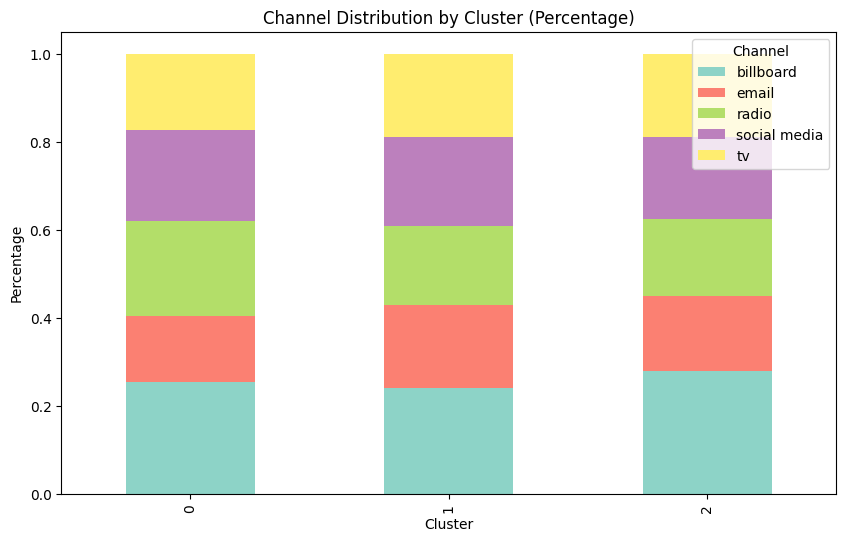

In [24]:
# Plot Channel distribution as a percentage by Cluster
channel_distribution_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Channel Distribution by Cluster (Percentage)')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.legend(title='Channel')
plt.show()

In [25]:
# Count the occurrences of each Region within each Cluster
region_distribution = high_budget_data.groupby(['Cluster', 'Region']).size().unstack()

# Calculate proportions within each cluster
region_distribution_percent = region_distribution.apply(lambda x: x / x.sum(), axis=1)

# Display the distribution as counts and percentages in table format
print("Region Distribution by Cluster (Counts):")
display(region_distribution.style.set_caption("Region Distribution by Cluster (Counts)"))

print("\nRegion Distribution by Cluster (Percentages):")
display(region_distribution_percent.style.format("{:.2%}").set_caption("Region Distribution by Cluster (Percentages)"))

Region Distribution by Cluster (Counts):


Region,johor,kuala lumpur,penang,sabah,sarawak
Cluster,,,,,
0,65,106,60,57,63
1,74,108,70,63,81
2,46,70,51,52,68



Region Distribution by Cluster (Percentages):


Region,johor,kuala lumpur,penang,sabah,sarawak
Cluster,,,,,
0,18.52%,30.20%,17.09%,16.24%,17.95%
1,18.69%,27.27%,17.68%,15.91%,20.45%
2,16.03%,24.39%,17.77%,18.12%,23.69%


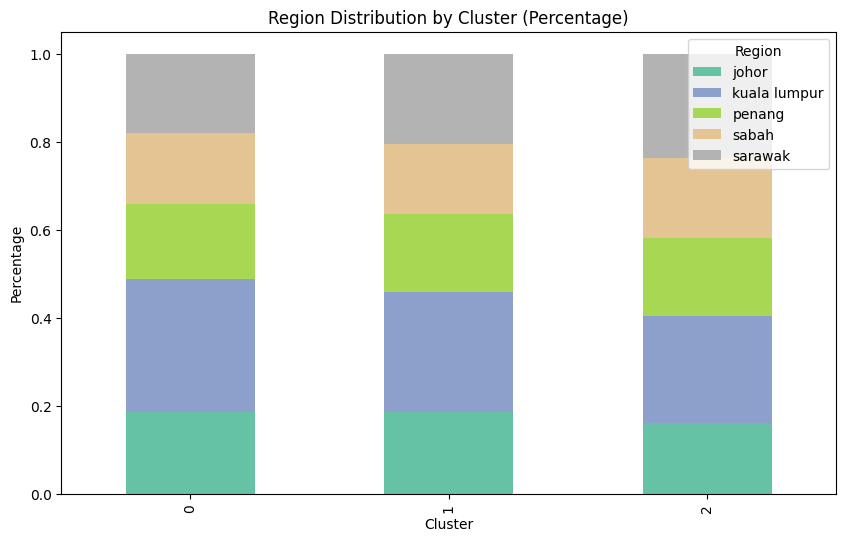

In [26]:
# Plot Region distribution as a percentage by Cluster
region_distribution_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Region Distribution by Cluster (Percentage)')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.legend(title='Region')
plt.show()

### **Overall Interpretation and Insights:**
**1. No Clear Overrepresentation by Channel or Region:**

- The lack of distinct differences in channel or region distribution across clusters suggests that channel and region are not primary drivers of campaign success in terms of ROI, especially for high-budget campaigns.

**2. Focus on Campaign Optimization:**

Since neither channel nor region seems to strongly influence performance, focus should be on other factors:
- Audience targeting: Refine target audiences within each region/channel combination to improve engagement.

- Content and Messaging: Experiment with content that resonates well with each cluster's characteristics, potentially drawing on factors like product type, customer demographics, and campaign duration.

- Budget Efficiency: Given the high budgets, it may be beneficial to allocate budget based on ROI optimization rather than specific channel or region preferences.

**3. Testing and Experimentation Across Channels and Regions:**

- Given the even distribution, it’s feasible to continue testing and optimizing campaigns across all channels and regions, rather than narrowing down to a specific subset. Using A/B testing for different strategies within each channel and region could help identify nuanced factors that influence campaign effectiveness.

### **6. Data Visualization**

#### **Define Key Performance Metrics by Channel**
Now I will identify the metrics that best represent "effectiveness." In marketing, these often include:

- ROI (Return on Investment): Measures the financial return relative to the campaign's cost.
- Conversions: The number of successful actions (e.g., purchases or sign-ups).
- Revenue: Total income generated from each channel.
- CTR (Click Through Rate): Indicates the engagement level of users.
- Customer Satisfaction: Provides qualitative insights into user experiences.

##### **Calculate and Visualize Key Metrics by Channel**
I will use summary statistics and visualizations to compare channels on these metrics.

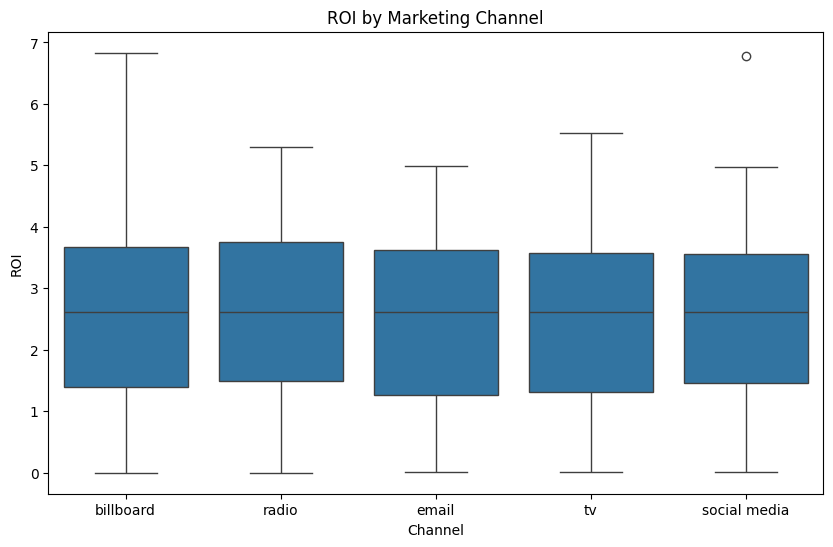

In [27]:
# Box plot to compare ROI across channels
plt.figure(figsize=(10, 6))
sns.boxplot(x='Channel', y='ROI', data=data)
plt.title('ROI by Marketing Channel')
plt.show()

In [28]:
# Ensure Start_Date is in datetime format
data['Start_Date'] = pd.to_datetime(data['Start_Date'], errors='coerce')

# Calculate monthly average ROI by Channel
monthly_roi = data.groupby([data['Start_Date'].dt.to_period('M'), 'Channel'])['ROI'].mean().reset_index()
monthly_roi['Start_Date'] = monthly_roi['Start_Date'].dt.to_timestamp()  # Convert period to timestamp for plotting

# Create an interactive line plot
fig = px.line(
    monthly_roi,
    x='Start_Date',
    y='ROI',
    color='Channel',
    title="Interactive Monthly Average ROI by Channel",
    labels={'Start_Date': 'Month', 'ROI': 'Average ROI'},
    template="plotly_dark"
)

# Customize the layout for better readability
fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Average ROI",
    hovermode="x unified"
)

# Display the interactive plot
fig.show()

In [29]:
# Prepare data by calculating average metrics by channel
channel_metrics = high_budget_data.groupby('Channel').agg({
    'ROI': 'mean',
    'Conversions': 'mean',
    'Customer_Satisfaction': 'mean'
}).reset_index()

# Melt data for interactive filtering
channel_metrics_melted = channel_metrics.melt(id_vars=['Channel'], var_name='Metric', value_name='Value')

# Interactive bar plot for channel metrics
fig = px.bar(channel_metrics_melted, x='Channel', y='Value', color='Metric', barmode='group',
             title="Interactive Channel Effectiveness by Metric",
             labels={'Value': 'Average Value'},
             template="plotly_dark")
fig.show()

### **7. Interpretation and Conclusions**

#### **1. Key Findings**
Based on the analyses performed (clustering, segmentation, time-series analysis, etc.), here are some key findings:

- Channel Effectiveness: Certain channels (like social media and email) generally performed better in terms of ROI, while others (such as TV and radio) showed lower performance. This suggests that digital channels may provide higher engagement and return on investment.

- Regional Performance: While the regional analysis didn’t show strong differentiation in campaign effectiveness, certain regions consistently performed within a predictable range, suggesting that campaign adjustments may not need to vary widely by region.

- Budget Allocation: High-budget campaigns did not always yield the highest ROI, indicating that increasing spend doesn’t always correlate with increased returns. Campaigns with moderate budgets often performed efficiently, showing high ROI without excessive spending.

- Customer Satisfaction and Campaign Effectiveness: Campaigns that scored high on customer satisfaction often also had higher conversions and ROI, suggesting a strong link between customer experience and campaign success.

- Seasonal Trends: Based on the time-series analysis, certain periods showed higher ROI across channels, indicating that seasonal factors might impact campaign performance. Leveraging high-engagement periods could improve effectiveness.

#### **2. Answering Key Questions**
Which Channels Are Most Effective?

- Finding: Social media and email showed the highest ROI on average. These channels should be prioritized for campaigns aiming to maximize ROI.
- Recommendation: Allocate a larger share of the budget to social media and email campaigns, especially for high-budget initiatives.

Which Regions Generate the Most Revenue?

- Finding: No specific region showed a distinct performance edge, suggesting that campaign effectiveness is consistent across regions.
- Recommendation: Focus on other factors, such as targeting and messaging, rather than heavily customizing campaigns by region.

Is There a Correlation Between Budget and ROI?

- Finding: While high-budget campaigns can yield high ROI, there are diminishing returns beyond a certain budget level.
- Recommendation: Use a data-driven approach to optimize budget allocation, especially for campaigns where lower budgets yield similar ROI.

#### **3. Actionable Recommendations**
Here are some concrete steps to improve campaign effectiveness based on our findings:

- Optimize Channel Mix: Invest more in high-performing channels like social media and email, while experimenting with optimizing lower-performing channels.

- Refine Budget Strategy: Rather than automatically increasing budgets, analyze the historical performance of similar campaigns to identify an optimal budget range.

- Use Targeted Retargeting: For campaigns with high engagement but lower conversions, implement retargeting strategies to convert engaged users.

- Leverage High-ROI Periods: Plan campaigns around periods identified as high-performing in the time-series analysis to take advantage of seasonal trends.

#### **4. Code Examples for Automation and Monitoring:**


This code generates a summary table showing average ROI, Customer Satisfaction, and Conversions by Channel, which can be regularly updated for monitoring purposes:

In [34]:
# Calculate average metrics by channel
channel_summary = data.groupby('Channel').agg({
    'ROI': 'mean',
    'Customer_Satisfaction': 'mean',
    'Conversions': 'sum'
}).reset_index()

# Display the summary as a formatted table
display(channel_summary.style.set_caption("Average Metrics by Channel").format({
    'ROI': "{:.2f}",
    'Customer_Satisfaction': "{:.2f}",
    'Conversions': "{:.0f}"
}))

,Channel,ROI,Customer_Satisfaction,Conversions
0,billboard,2.53,2.94,5070889
1,email,2.51,2.96,3844770
2,radio,2.60,3.00,4001370
3,social media,2.54,3.10,4190369
4,tv,2.48,2.96,3579888


This code identifies campaigns with exceptionally high ROI, helping to pinpoint effective strategies:

In [38]:
# Set ROI threshold to identify high-performing campaigns
roi_threshold = data['ROI'].quantile(0.75)

# Filter campaigns with ROI above the threshold
high_performance_campaigns = data[data['ROI'] >= roi_threshold]
print("High-Performance Campaigns:")
print(high_performance_campaigns[['Campaign_ID', 'Channel', 'ROI', 'Budget', 'Spend', 'Conversions']])

High-Performance Campaigns:
     Campaign_ID    Channel   ROI    Budget     Spend  Conversions
1        cam0002  billboard  3.78  468792.0   33743.0       9459.0
14       cam0015      radio  4.11  398390.0   85313.0       9024.0
17       cam0018         tv  4.68   95047.0  143469.0       6712.0
22       cam0023      radio  4.56  152124.0   93699.0       5928.0
26       cam0027         tv  4.76   71589.0  322417.0       7424.0
...          ...        ...   ...       ...       ...          ...
4957     cam4958  billboard  3.94  222005.0   70011.0        223.0
4964     cam4965  billboard  4.46  226778.0   31873.0       4845.0
4965     cam4966  billboard  3.65  124008.0  349590.0       4014.0
4986     cam4987  billboard  4.30  190633.0  229281.0       7742.0
4988     cam4989  billboard  4.17  265945.0  345314.0       6001.0

[1041 rows x 6 columns]


Using Pandas, generate a simple report summarizing campaign performance metrics that can be exported as a CSV or Excel file for stakeholders:

In [41]:
# Generate summary report for key metrics
report = data.groupby(['Channel', 'Region']).agg({
    'Budget': 'sum',
    'Spend': 'sum',
    'Revenue': 'sum',
    'ROI': 'mean',
    'Conversions': 'sum',
    'Customer_Satisfaction': 'mean'
}).reset_index()

# Export report to CSV
report.to_csv('campaign_performance_report.csv', index=False)
print("Report saved as 'campaign_performance_report.csv'")

Report saved as 'campaign_performance_report.csv'


##### **Summary of Recommended Strategies:**

- Invest in High-Performing Channels and Regions: Allocate more budget to channels and regions with a proven track record.

- Optimize Budget Based on ROI: Adjust budgets for high- and low-ROI campaigns.

- Use Data-Driven Audience Segmentation: Tailor messages to segments identified in clustering analysis.

- Refine Content and Messaging: Run A/B tests and optimize content for high engagement.

- Monitor Duration and Optimize Length: Set optimal campaign durations and use retargeting for long campaigns.

- Utilize Real-Time Interactive Dashboards: Track and adjust campaign performance dynamically.

- Optimize for Mobile and Social Engagement: Ensure mobile-friendly and interactive content.

- Conduct Post-Campaign Analysis: Establish benchmarks and build a knowledge base for ongoing improvement.

- Explore Predictive Modeling: Use machine learning to predict outcomes and optimize targeting.